# Convolutional Neural Networks

[Convolution](https://classroom.udacity.com/courses/ud187/lessons/f00868fe-5974-48c4-bf36-41c0372bed64/concepts/f55cf762-2c40-4d26-b98c-3685c3371e57)

[What is the rationale behind convolution?](https://www.youtube.com/watch?v=x_VrgWTKkiM)

[Max Pooling](https://classroom.udacity.com/courses/ud187/lessons/f00868fe-5974-48c4-bf36-41c0372bed64/concepts/b48b0343-4736-42ad-bd04-b031386ffb84)

In [1]:
import tensorflow as tf

from tensorflow import keras

[Cats and Dogs](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip)

In [2]:
import numpy as np

import pandas as pd

import os

import sys

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
!{sys.executable} -m pip install opencv-python

## Reading data

In [4]:
import cv2

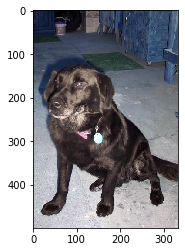

In [5]:
DATADIR = 'data/PetImages/'
CATEGORIES = ['Dog', 'Cat']
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array,)
        plt.show()
        break
    break

In [6]:
img_array.shape

(500, 333, 3)

In [7]:
## note that the sizes of the images are not necessarily the same.

## Normalizing the data shape

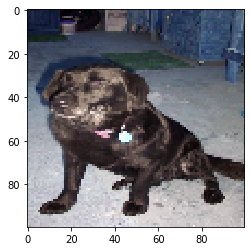

In [8]:
IMG_SIZE_HEIGHT = 100

IMG_SIZE_WIDTH = 100

new_array = cv2.resize(img_array, (IMG_SIZE_WIDTH, IMG_SIZE_HEIGHT))

plt.imshow(new_array)

## Creating Train Data

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE_WIDTH, IMG_SIZE_HEIGHT))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
create_training_data()
        

Thumbs.db OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

11410.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

7133.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

6238.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

2688.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

5736.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-2

3300.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

11874.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

10404.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

7978.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

9565.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

9171.jpg OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-2

In [10]:
print(len(training_data))

24946


In [11]:
import random

In [12]:
random.shuffle(training_data)

In [13]:
for sample in training_data[0:3]:
    print(sample[0])

[[[115 180 164]
  [119 186 165]
  [110 176 159]
  ...
  [137 200 191]
  [125 188 178]
  [122 185 176]]

 [[ 98 166 143]
  [102 170 145]
  [109 177 153]
  ...
  [105 174 162]
  [128 192 180]
  [110 173 163]]

 [[ 98 167 140]
  [ 84 154 123]
  [109 179 151]
  ...
  [110 175 160]
  [126 191 175]
  [103 168 153]]

 ...

 [[103 157 144]
  [145 205 191]
  [102 164 153]
  ...
  [ 93 152 147]
  [112 169 154]
  [138 196 178]]

 [[119 173 154]
  [107 164 152]
  [107 166 155]
  ...
  [ 73 132 117]
  [ 70 127 112]
  [ 52 107  90]]

 [[116 173 159]
  [ 99 153 146]
  [114 169 161]
  ...
  [ 51 118  91]
  [125 191 162]
  [ 88 155 126]]]
[[[152 156 149]
  [204 210 181]
  [207 207 178]
  ...
  [211 212 185]
  [ 89  87  77]
  [211 213 192]]

 [[155 159 152]
  [204 210 181]
  [208 208 179]
  ...
  [206 207 181]
  [ 68  66  56]
  [207 209 188]]

 [[158 163 153]
  [202 208 179]
  [210 209 183]
  ...
  [208 205 185]
  [ 63  58  50]
  [209 211 191]]

 ...

 [[156 152 156]
  [150 147 149]
  [153 151 151]
  ..

Creating X-y 

In [14]:
X = []

y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

In [15]:
X.shape

(24946, 100, 100, 3)

We don't want to do all these steps again let's save the progress.

In [67]:
import pickle

In [68]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

OverflowError: cannot serialize a bytes object larger than 4 GiB

Note that pickle couldn't write the file as it is bigger than 4GB. Instead we will try numpy.

In [16]:
np.save('X.npy', X)

In [17]:
np.save('y.npy', y)

## Loading the data

In [40]:
X = np.load('X.npy')

In [41]:
y = np.load('y.npy')

In [42]:
X.shape

(24946, 100, 100, 3)

In [43]:
y.shape

(24946,)

## Convolutional Neural Networks

In [44]:
from keras.models import Sequential
from keras.layers import (Dense, 
                          Dropout,
                          Activation, 
                          Flatten,
                          Conv2D,
                          MaxPooling2D)


In [45]:
X.shape

(24946, 100, 100, 3)

In [46]:
X = X/255

In [47]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (100, 100, 3), activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), input_shape = (100, 100, 3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [48]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2560064   
_________________________________________________________________
dense_9 (Dense)              (None, 16)               

In [50]:
model.fit(X,y, batch_size= 32, epochs= 5, validation_split= 0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 178s 8ms/step - loss: 0.6081 - accuracy: 0.6624 - val_loss: 0.5660 - val_accuracy: 0.7034
Epoch 2/5
22451/22451 [==============================] - 197s 9ms/step - loss: 0.4965 - accuracy: 0.7555 - val_loss: 0.4817 - val_accuracy: 0.7643
Epoch 3/5
22451/22451 [==============================] - 190s 8ms/step - loss: 0.4173 - accuracy: 0.8071 - val_loss: 0.4571 - val_accuracy: 0.7868
Epoch 4/5
22451/22451 [==============================] - 212s 9ms/step - loss: 0.3399 - accuracy: 0.8494 - val_loss: 0.4661 - val_accuracy: 0.7948
Epoch 5/5
22451/22451 [==============================] - 214s 10ms/step - loss: 0.2375 - accuracy: 0.9012 - val_loss: 0.5107 - val_accuracy: 0.7960


In [51]:
model.save('cnn_cat_dogs_2')

# Loading the model and making predictions

In [54]:
loaded_model = tf.keras.models.load_model('cnn_cat_dogs_2')

In [109]:
def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath)/255
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array

prediction = loaded_model.predict([prepare('img/zeytin.jpg').reshape(-1, 100, 100, 3)])

In [105]:
print(CATEGORIES[int(prediction.round())])

Cat


# Resources

- [Keras Tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN)

- [Udacity course of Google](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb)

- [Data Augmentation](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c02_dogs_vs_cats_with_augmentation.ipynb#scrollTo=Evjf8jZk2zi-)

- [Transfer Learning](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c01_tensorflow_hub_and_transfer_learning.ipynb#scrollTo=y_6bGjoPtzau)